<a href="https://colab.research.google.com/github/hitomitsu50/SportsData_Portfolio/blob/main/2024%E5%B9%B4_Statcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
! pip install pybaseball japanize_matplotlib

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [22]:
!sudo apt-get -y install fonts-japanese-gothic
!sudo apt-get -y install fonts-japanese-mincho
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package fonts-japanese-gothic is a virtual package provided by:
  fonts-ipafont-nonfree-jisx0208 1:00103-7
  fonts-vlgothic 20200720-1ubuntu1
  fonts-umeplus-cl 20180604-2
  fonts-takao-pgothic 00303.01-3ubuntu1
  fonts-takao-gothic 00303.01-3ubuntu1
  fonts-mona 1:2.90-1.1
  fonts-ipafont-gothic 00303-21ubuntu1
  fonts-ipaexfont-gothic 00401-3ubuntu1
You should explicitly select one to install.

E: Package 'fonts-japanese-gothic' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package fonts-japanese-mincho is a virtual package provided by:
  fonts-ipafont-nonfree-jisx0208 1:00103-7
  fonts-umeplus-cl 20180604-2
  fonts-takao-mincho 00303.01-3ubuntu1
  fonts-ipafont-mincho 00303-21ubuntu1
  fonts-ipaexfont-mincho 00401-3ubuntu1
  fonts-hanazono 20170904-2.1
You should explicitly select one to install.

E: Package

In [38]:
from pybaseball import statcast
import pandas as pd
import time

# 2024年シーズンの各月の日付範囲
months_2024 = [
    ("2024-03-20", "2024-03-31"), # 3月 (シーズン開始日による)
    ("2024-04-01", "2024-04-30"), # 4月
    ("2024-05-01", "2024-05-31"), # 5月
    ("2024-06-01", "2024-06-30"), # 6月
    ("2024-07-01", "2024-07-31"), # 7月
    ("2024-08-01", "2024-08-31"), # 8月
    ("2024-09-01", "2024-09-30")  # 9月
]

# データをダウンロードしてCSVとして保存
for start_dt, end_dt in months_2024:
    print(f"{start_dt} から {end_dt} のデータをダウンロード中...")
    try:
        # Statcastデータを取得
        df_month = statcast(start_dt=start_dt, end_dt=end_dt)

        # ファイル名を生成 (例: statcast_20240320-20240331.csv)
        filename = f"sample_data/statcast_{start_dt}-{end_dt}.csv"

        # データをCSVファイルとして保存
        df_month.to_csv(filename, index=False)
        print(f"{filename} に保存しました。")

        # サーバーへの負荷を考慮して少し待機
        time.sleep(5)

    except Exception as e:
        print(f"{start_dt} から {end_dt} のデータのダウンロード中にエラーが発生しました: {e}")

print("全ての月のデータのダウンロードと保存が完了しました。")

2024-03-20 から 2024-03-31 のデータをダウンロード中...
This is a large query, it may take a moment to complete


  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  8%|▊         | 1/12 [00:04<00:49,  4.49s/it]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 17%|█▋        | 2/12 [00:06<00:27,  2.76s/it]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datet

sample_data/statcast_2024-03-20-2024-03-31.csv に保存しました。
2024-04-01 から 2024-04-30 のデータをダウンロード中...
This is a large query, it may take a moment to complete


  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = d

sample_data/statcast_2024-04-01-2024-04-30.csv に保存しました。
2024-05-01 から 2024-05-31 のデータをダウンロード中...
This is a large query, it may take a moment to complete


  0%|          | 0/31 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = d

sample_data/statcast_2024-05-01-2024-05-31.csv に保存しました。
2024-06-01 から 2024-06-30 のデータをダウンロード中...
This is a large query, it may take a moment to complete


  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = d

sample_data/statcast_2024-06-01-2024-06-30.csv に保存しました。
2024-07-01 から 2024-07-31 のデータをダウンロード中...
This is a large query, it may take a moment to complete


  0%|          | 0/31 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  3%|▎         | 1/31 [00:00<00:29,  1.03it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  6%|▋         | 2/31 [00:01<00:24,  1.16it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datet

sample_data/statcast_2024-07-01-2024-07-31.csv に保存しました。
2024-08-01 から 2024-08-31 のデータをダウンロード中...
This is a large query, it may take a moment to complete


  0%|          | 0/31 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = d

sample_data/statcast_2024-08-01-2024-08-31.csv に保存しました。
2024-09-01 から 2024-09-30 のデータをダウンロード中...
This is a large query, it may take a moment to complete


  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  3%|▎         | 1/30 [00:00<00:23,  1.26it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch excepti

sample_data/statcast_2024-09-01-2024-09-30.csv に保存しました。
全ての月のデータのダウンロードと保存が完了しました。


上記のコードで各月のデータが `sample_data` ディレクトリにCSVファイルとして保存されます。

次に、これらの保存されたCSVファイルを読み込み、一つのデータフレームに結合するコードを生成します。

In [39]:
import pandas as pd
import glob

# sample_data ディレクトリ内の Statcast CSV ファイルのリストを取得
# ファイル名パターンに合わせて修正してください (例: statcast_YYYY-MM-DD-YYYY-MM-DD.csv)
csv_files_pattern = "sample_data/statcast_*.csv"
csv_files = glob.glob(csv_files_pattern)

# 各CSVファイルを読み込み、データフレームのリストを作成
dfs = []
for file in csv_files:
    try:
        df_month = pd.read_csv(file)
        dfs.append(df_month)
        print(f"{file} を読み込みました。")
    except Exception as e:
        print(f"{file} の読み込み中にエラーが発生しました: {e}")


# 全てのデータフレームを結合
if dfs:
    df_combined = pd.concat(dfs, ignore_index=True)
    # 結合したデータフレームを 'df' 変数に代入
    df = df_combined
    print("全てのデータフレームを結合しました。")
    display(df.head())
    print(f"結合後のデータフレームの行数: {len(df)}")
else:
    print("読み込めるCSVファイルが見つかりませんでした。")

sample_data/statcast_2024-07-01-2024-07-31.csv を読み込みました。
sample_data/statcast_2024-06-01-2024-06-30.csv を読み込みました。
sample_data/statcast_2024-04-01-2024-04-30.csv を読み込みました。
sample_data/statcast_2024-05-01-2024-05-31.csv を読み込みました。
sample_data/statcast_2024-03-20-2024-03-31.csv を読み込みました。
sample_data/statcast_2024-08-01-2024-08-31.csv を読み込みました。
sample_data/statcast_2024-09-01-2024-09-30.csv を読み込みました。
全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SI,2024-07-31,90.6,-3.65,3.68,"Thompson, Ryan",656180,657044,field_out,hit_into_play,...,7.0,3.64,1.04,1.04,-8.5,-24.126498,27.732897,43.524299,34.924618,7.941460
1,SI,2024-07-31,90.2,-3.71,3.61,"Thompson, Ryan",656180,657044,NaN,ball,...,7.0,3.41,1.15,1.15,-8.3,NaN,NaN,NaN,NaN,NaN
2,SI,2024-07-31,91.7,-3.76,3.68,"Thompson, Ryan",671277,657044,NaN,ball,...,2.0,3.20,1.31,-1.31,-10.2,NaN,NaN,NaN,NaN,NaN
3,SI,2024-07-31,91.7,-3.59,3.70,"Thompson, Ryan",671277,657044,NaN,ball,...,2.0,3.15,1.19,-1.19,-9.0,NaN,NaN,NaN,NaN,NaN
4,SI,2024-07-31,92.0,-3.62,3.71,"Thompson, Ryan",623912,657044,strikeout,foul_tip,...,2.0,3.30,1.32,1.32,-8.8,-2.891539,6.475536,31.392437,50.520387,19.902998


結合後のデータフレームの行数: 730058


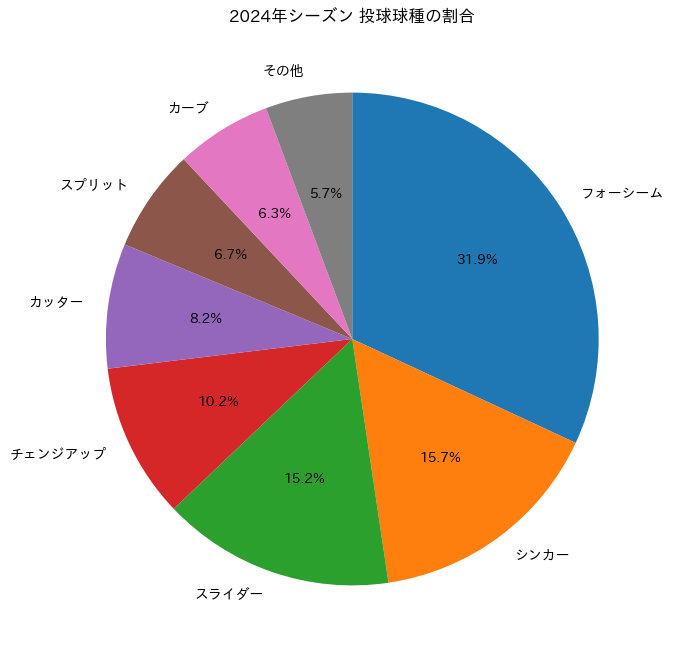

In [41]:
# 数値列をfloat型に変換してから結合 (結合はセル e41356df で完了)
numeric_cols = ['release_speed', 'release_pos_x', 'release_pos_z', 'batter_days_until_next_game',
                'api_break_z_with_gravity', 'api_break_x_arm', 'api_break_x_batter_in', 'arm_angle',
                'attack_angle', 'attack_direction', 'swing_path_tilt',
                'intercept_ball_minus_batter_pos_x_inches', 'intercept_ball_minus_batter_pos_y_inches']

# df はセル e41356df で読み込まれた全データを含むデータフレーム
# 既に結合されているため、再度結合する必要はありません。

# 数値列をfloat型に変換 (結合済みのdfに対して実行)
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


# 球種を日本語に変換
pitch_map={"FF":"フォーシーム","SI":"シンカー","SL":"スライダー","CH":"チェンジアップ","FC":"カッター",
           "ST":"スプリット","CU":"カーブ","FS":"ファストボール","KC":"ナックルカーブ","KN":"ナックルボール"}
df["pitch_type_jp"]=df["pitch_type"].replace(pitch_map)

# 投球数の割合を計算
pitch_counts=df["pitch_type_jp"].value_counts(normalize=True)*100

# 5%未満をその他にまとめる
pitch_counts_grouped=pitch_counts.copy()
pitch_counts_grouped[pitch_counts_grouped<5]=0
others=pitch_counts[pitch_counts_grouped<5].sum()
pitch_counts_grouped=pitch_counts_grouped[pitch_counts_grouped>5]
pitch_counts_grouped["その他"]=others

# 円グラフ表示
plt.figure(figsize=(8,8))
plt.pie(pitch_counts_grouped, labels=pitch_counts_grouped.index,autopct="%1.1f%%",startangle=90, counterclock=False) # counterclock=False を追加
plt.title("2024年シーズン 投球球種の割合")
plt.show()